In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as md

In [3]:
#reading the O2 csv file
df_o = pd.read_csv("Merging\Sauerstoffgehalt\O1988_2022.csv", encoding = 'unicode_escape', sep = ',')
df_o

,Datum,Uhrzeit,Sauerstoffgehalt_[mg/l]
0,1988-06-19,01:00:00,8.1
1,1988-06-19,01:05:00,8.1
2,1988-06-19,01:10:00,8.1
3,1988-06-19,01:15:00,8.1
4,1988-06-19,01:20:00,8.1
...,...,...,...
1679896,2022-12-31,23:10:00,NaN
1679897,2022-12-31,23:20:00,NaN
1679898,2022-12-31,23:30:00,NaN
1679899,2022-12-31,23:40:00,NaN


In [4]:
#reading the O2 csv file
df_pH = pd.read_csv("Merging\pH\pH1988_2022.csv", encoding = 'unicode_escape', sep = ',')
df_pH

,Datum,Uhrzeit,pH_Wert
0,1988-06-19,01:00:00,7.50
1,1988-06-19,01:05:00,7.50
2,1988-06-19,01:10:00,7.50
3,1988-06-19,01:15:00,7.50
4,1988-06-19,01:20:00,7.50
...,...,...,...
1679266,2022-12-31,23:10:00,7.95
1679267,2022-12-31,23:20:00,7.95
1679268,2022-12-31,23:30:00,7.95
1679269,2022-12-31,23:40:00,7.95


In [5]:
#Merging O2 and pH has values with inner join from 1988 to 2022
df_o_pH = df_pH.merge( df_o, on = ['Datum', 'Uhrzeit'], how ="inner")
#Drop the rows with missing values for better readability and faster computetaion
df_o_pH.dropna(subset=['pH_Wert', 'Sauerstoffgehalt_[mg/l]'], inplace = True )
#Change the forma to datetime
df_o_pH['Datum'] = pd.to_datetime(df_o_pH['Datum'])
df_o_pH['Uhrzeit'] = pd.to_datetime(df_o_pH['Uhrzeit'], format='%H:%M:%S', errors='coerce').dt.time
df_o_pH

,Datum,Uhrzeit,pH_Wert,Sauerstoffgehalt_[mg/l]
0,1988-06-19,01:00:00,7.50,8.10
1,1988-06-19,01:05:00,7.50,8.10
2,1988-06-19,01:10:00,7.50,8.10
3,1988-06-19,01:15:00,7.50,8.10
4,1988-06-19,01:20:00,7.50,8.10
...,...,...,...,...
1678481,2022-12-28,06:30:00,8.01,12.93
1678482,2022-12-28,06:40:00,8.01,12.93
1678483,2022-12-28,06:50:00,8.00,12.92
1678484,2022-12-28,07:00:00,8.00,12.92


In [6]:
#Exporting to csv file
df_o_pH.to_csv('Merging\O2_pH\O2_pH.csv', index = False)

In [7]:
#Creatin a year and month column for hue arg, and for removing winter months
df_o_pH['Jahr'] = df_o_pH['Datum'].dt.year
df_o_pH['Monat'] = df_o_pH['Datum'].dt.month

df_o_pH


,Datum,Uhrzeit,pH_Wert,Sauerstoffgehalt_[mg/l],Jahr,Monat
0,1988-06-19,01:00:00,7.50,8.10,1988,6
1,1988-06-19,01:05:00,7.50,8.10,1988,6
2,1988-06-19,01:10:00,7.50,8.10,1988,6
3,1988-06-19,01:15:00,7.50,8.10,1988,6
4,1988-06-19,01:20:00,7.50,8.10,1988,6
...,...,...,...,...,...,...
1678481,2022-12-28,06:30:00,8.01,12.93,2022,12
1678482,2022-12-28,06:40:00,8.01,12.93,2022,12
1678483,2022-12-28,06:50:00,8.00,12.92,2022,12
1678484,2022-12-28,07:00:00,8.00,12.92,2022,12


In [31]:
#Changing column names to English
df_o_pH.columns = ['Date', 'Hour', 'pH_Value', 'Oxygen content_[mg/l]', 'Year',
       'Month']


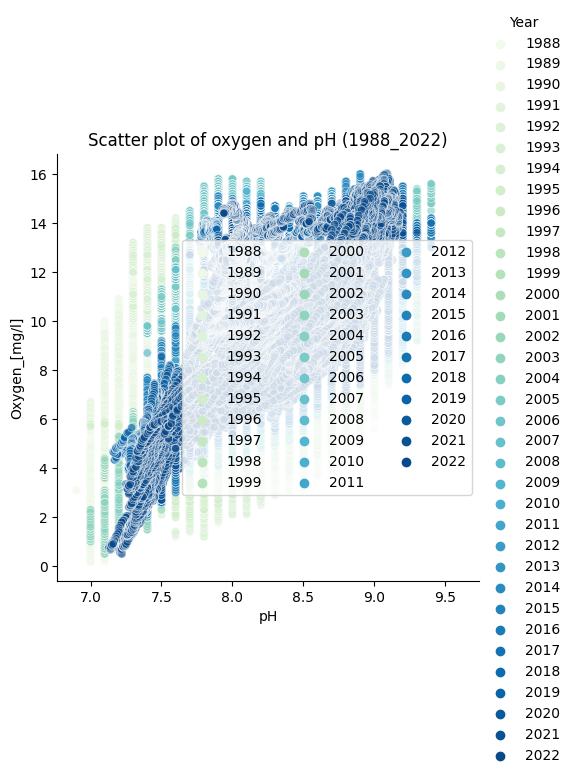

In [51]:
#Create a palette with 9 colors
custom_palette = sns.color_palette("GnBu", 35)
#Plot the graph
fig = sns.relplot(x = 'pH_Value', y = 'Oxygen content_[mg/l]', data = df_o_pH, kind = 'scatter', hue = 'Year',
            alpha = 0.6, palette = custom_palette).set(title = "Scatter plot of oxygen and pH (1988_2022)")
fig.set_xlabels("pH")
fig.set_ylabels("Oxygen_[mg/l]")
plt.legend(ncol=3, loc = 'right')
plt.show()

In [34]:
#Subtract the data for the years after 2014
df_o_pH_2014 = df_o_pH.copy(deep=True)
startyear = pd.to_datetime('2014-01-01')
df_o_pH_2014 = df_o_pH_2014[df_o_pH_2014['Date'] > startyear]
#df_o_pH_2014.dropna(inplace = True)
df_o_pH_2014


,Date,Hour,pH_Value,Oxygen content_[mg/l],Year,Month
1232393,2014-01-02,00:00:00,8.00,13.00,2014,1
1232394,2014-01-02,00:10:00,8.00,12.90,2014,1
1232395,2014-01-02,00:20:00,8.00,12.90,2014,1
1232396,2014-01-02,00:30:00,8.00,12.90,2014,1
1232397,2014-01-02,00:40:00,8.00,12.80,2014,1
...,...,...,...,...,...,...
1678481,2022-12-28,06:30:00,8.01,12.93,2022,12
1678482,2022-12-28,06:40:00,8.01,12.93,2022,12
1678483,2022-12-28,06:50:00,8.00,12.92,2022,12
1678484,2022-12-28,07:00:00,8.00,12.92,2022,12


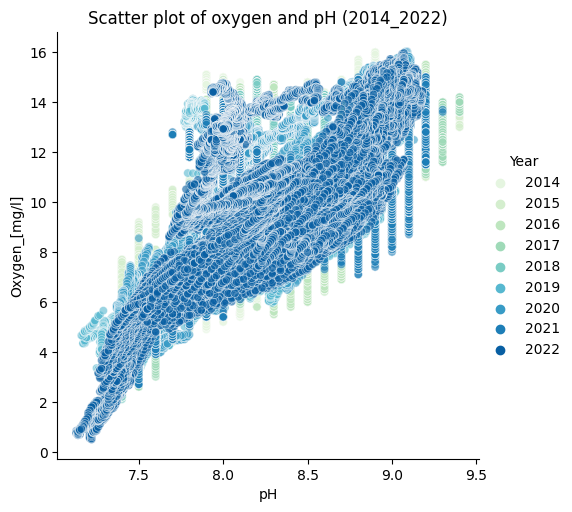

In [35]:
#Create a palette with 9 colors
custom_palette = sns.color_palette("GnBu", 9)
#Plot the graph
fig = sns.relplot(x = 'pH_Value', y = 'Oxygen content_[mg/l]', data = df_o_pH_2014, kind = 'scatter', hue = 'Year',
            alpha = 0.6, palette = custom_palette).set(title = "Scatter plot of oxygen and pH (2014_2022)")
fig.set_xlabels("pH",fontsize=10)
fig.set_ylabels("Oxygen_[mg/l]",fontsize=10)
fig._legend.set_title("Year")
plt.show()

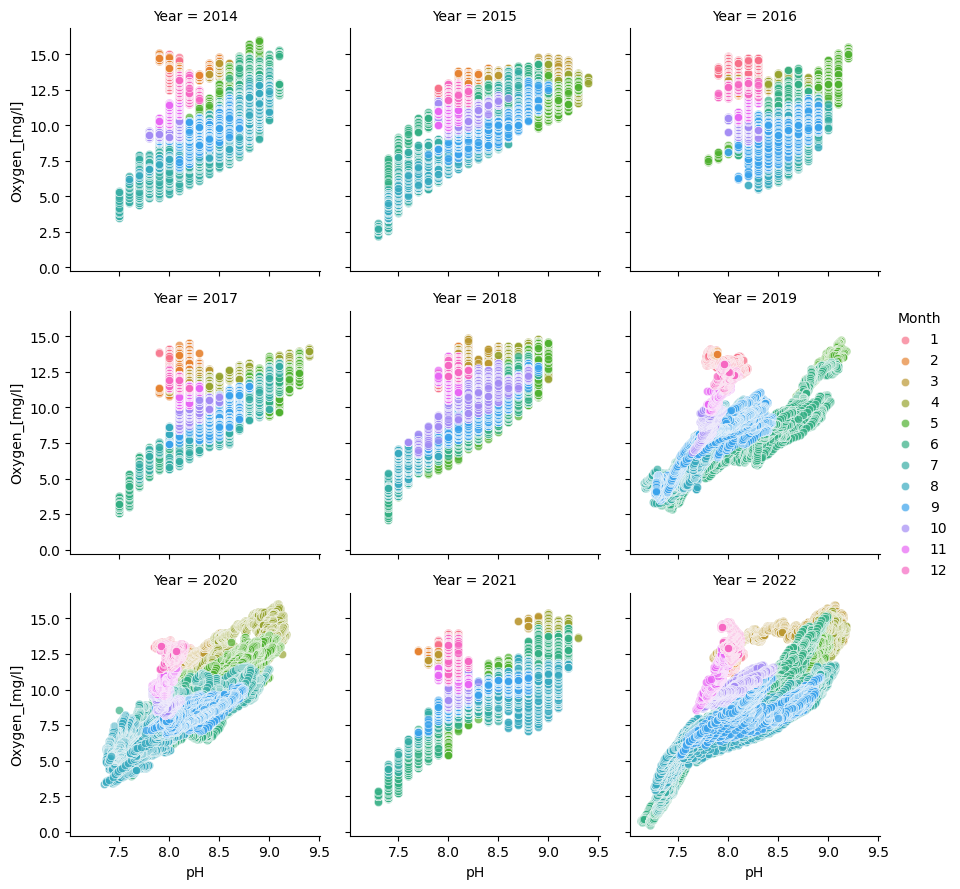

In [41]:
g = sns.FacetGrid(df_o_pH_2014, col="Year", col_wrap = 3, hue = 'Month')
g.map(sns.scatterplot, "pH_Value", "Oxygen content_[mg/l]", alpha=.7)
g.set_xlabels("pH",fontsize=10)
g.set_ylabels("Oxygen_[mg/l]",fontsize=10)
g.add_legend()

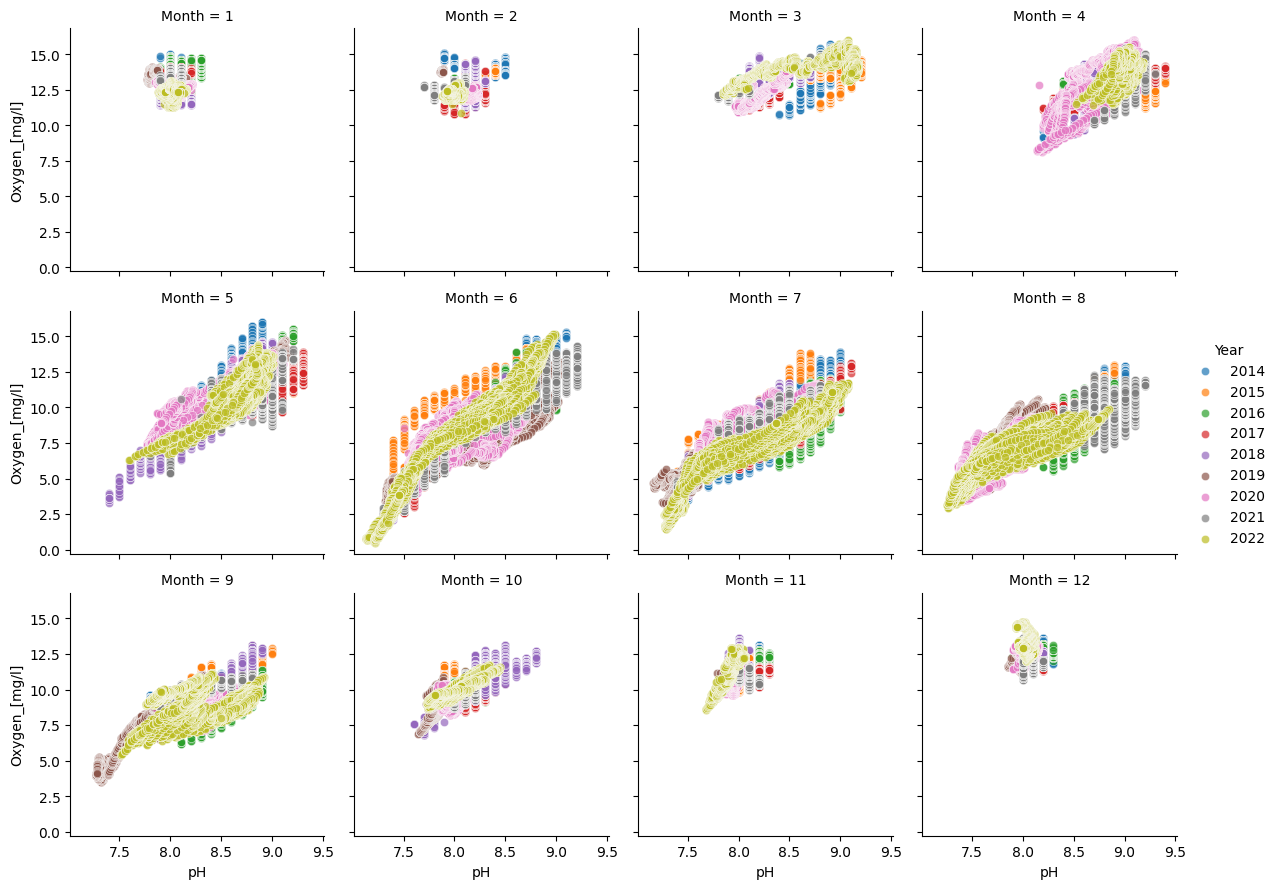

In [45]:
m = sns.FacetGrid(df_o_pH_2014, col="Month", col_wrap = 4, hue = 'Year')
m.map(sns.scatterplot, "pH_Value", "Oxygen content_[mg/l]", alpha=.7)
m.set_xlabels("pH",fontsize=10)
m.set_ylabels("Oxygen_[mg/l]",fontsize=10)
m.add_legend()